# How brain images are stored

We will use the nilearn library to read open data from the web on our computer.

In [1]:
from nilearn import datasets

Nilearn contains functions which copy files containing brain images to our local computer.

In [2]:
haxby_dataset = datasets.fetch_haxby()

The variable <code>haxby_dataset</code> stores the path to the brain image files that we just downloaded.

In [3]:
haxby_dataset.anat

['/Users/beau/nilearn_data/haxby2001/subj2/anat.nii.gz']

Brain images can be stored in many different types of files, including the Neuroimaging Informatics Technology Initiative (NIfTI) format, the Digital Imaging and Communications in Medicine standard (DICOM), and many others. We will be using NIfTI files to store brain images. 

The file name provides information about the type of data stored in it and the file format. We can tell from the file name above that it contains an anatomical image ("anat"), that it is a NIfTI file (because of the ".nii" extension) and that it is compressed using gzip (the ".gz" extension.)

Next we need to read the file into a variable in our Python environment. Nilearn provides tools for reading and writing NIfTI files in nilearn.image.

In [4]:
from nilearn import image

haxby_anat = image.load_img(haxby_dataset.anat)

Now the variable <code>haxby_anat</code> contains the brain image data stored in the NIfTI file we downloaded, as well as lots of information about the brain image, or _metadata._

In [5]:
haxby_anat_data = haxby_anat.get_data()

One important property of a brain image is its _shape,_ or the number of data points in the x, y, z, and time dimensions.

In [6]:
haxby_anat_data.shape

(124, 256, 256, 1)

We see the shape of the data has 4 values, each corresponding to a dimension. By convention, the first three dimensions are x, y, and z, and the fourth dimension is time.

Nilearn uses NumPy, a Python library for scientific computing, to store the image data.

In [7]:
type(haxby_anat_data)

numpy.ndarray

We can use NumPy's array indexing syntax to take a closer look at the data. Let's select all of the values along the y and z-axes, while holding the x and time axes fixed.

In [8]:
haxby_anat_data[65, :, :, 0]

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=int16)

The result is a NumPy array containing values that correspond to the intensity value at each (y, z) location. It's hard to tell what's going on just reading the numbers, so let's use Matplotlib to plot the result.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

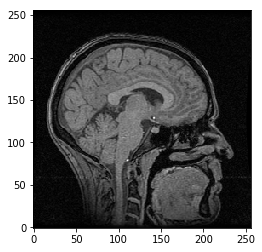

In [10]:
# Note that we must transpose the data and set the origin argument to 'lower'
# which sets the origin of the plot to the lower-left corner.
plt.imshow(haxby_anat_data[65, :, :, 0].T, cmap='gray', interpolation='none', origin="lower");

Now we can clearly see that selecting all y and z-axis values while holding the x-axis value constant gives us a saggital slice of the brain image. 

Similarly, holding the y axis constant provides a coronal slice:

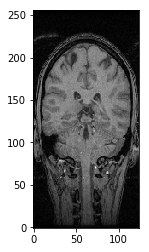

In [11]:
plt.imshow(haxby_anat_data[:, 100, :, 0].T, cmap='gray', interpolation='none', origin="lower");

And holding the z-axis constant provides an axial slice:

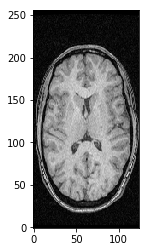

In [12]:
plt.imshow(haxby_anat_data[:, :, 150, 0].T, cmap='gray', interpolation='none', origin="lower");

Nilearn provides a collection of functions that simplify plotting neuroimaging data. Let's use these functions to simultaneously plot coronal, saggital, and axial slices of our anatomical image.

In [14]:
from nilearn import plotting

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


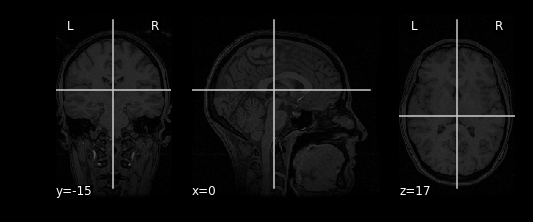

In [15]:
plotting.plot_anat(haxby_anat);

This contrast (the difference between the darkest and lightest parts of the image) is a little low. Let's find the value of the brightest part of the image, and use a value _lower_ than the brightest value as the maximum for our plot, increasing the contrast.

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


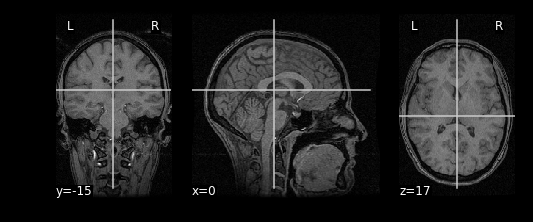

In [16]:
haxby_max = haxby_anat_data.max()
plotting.plot_anat(haxby_anat, vmax=haxby_max/2);